In [51]:
#Importing necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import warnings
warnings.filterwarnings('ignore')


In [52]:
#Reading data file
data=pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [53]:
#Checking few samples to understand to understand data better
data.sample(n=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
631,10.4,0.280,0.54,2.7,0.105,5.0,19.0,0.99880,3.25,0.63,9.5,5
102,8.1,0.545,0.18,1.9,0.080,13.0,35.0,0.99720,3.30,0.59,9.0,6
313,8.6,0.470,0.30,3.0,0.076,30.0,135.0,0.99760,3.30,0.53,9.4,5
1008,8.9,0.350,0.40,3.6,0.110,12.0,24.0,0.99549,3.23,0.70,12.0,7
1318,7.5,0.630,0.27,2.0,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6
312,9.0,0.460,0.31,2.8,0.093,19.0,98.0,0.99815,3.32,0.63,9.5,6
192,6.8,0.630,0.12,3.8,0.099,16.0,126.0,0.99690,3.28,0.61,9.5,5
851,9.3,0.430,0.44,1.9,0.085,9.0,22.0,0.99708,3.28,0.55,9.5,5
805,8.2,0.280,0.40,2.4,0.052,4.0,10.0,0.99356,3.33,0.70,12.8,7
498,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8


In [54]:
data.shape

(1599, 12)

In [55]:
#Checking for null values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [56]:
#Checking data type and null values for features and label
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [57]:
#Getting better insights of data 
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#Observation
#1.The difference between 75% and max for residual sugar, free sulfur dioxide and total sulfur dioxide is much higher which means there can be outliers.
#2.There are no null values.
#3.The rest of the data seems normal


In [58]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

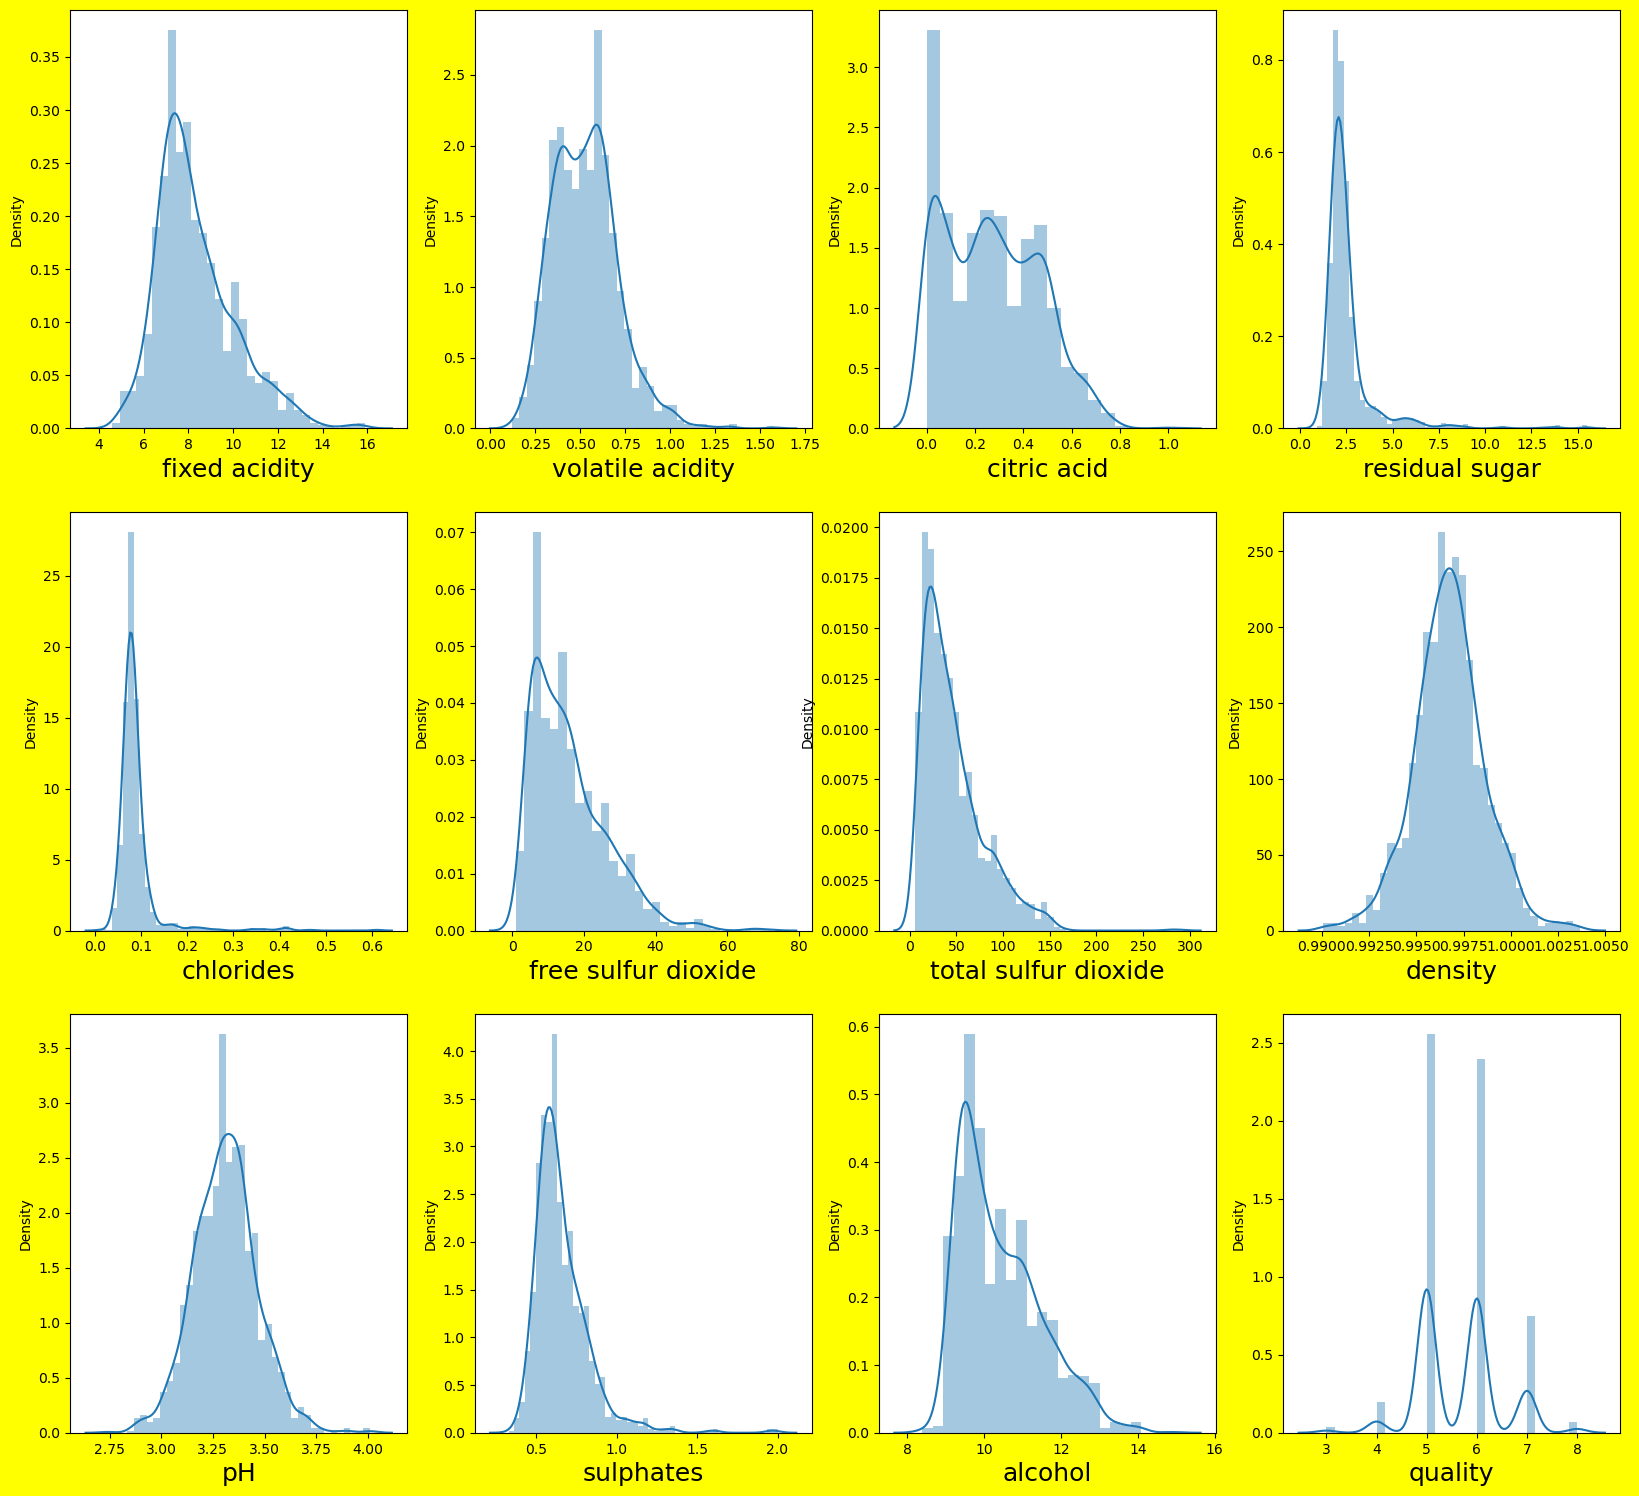

In [59]:
#Let's see how the data is distributed
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
    plt.show

In [ ]:
#Residual sugar,free sulphur dioxide,total sulphur dioxide,chlorides and alcohol seem to have skewness


In [60]:
#Separating features to check for outliers
df_features= data.drop('quality',axis=1)

In [61]:
df_features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


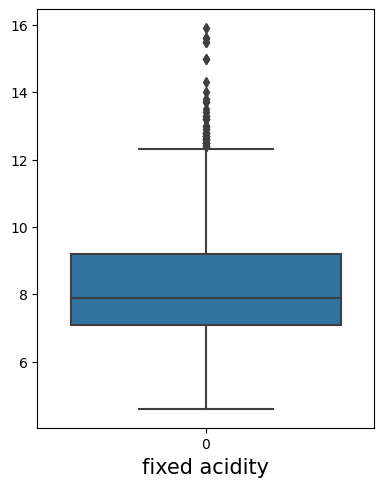

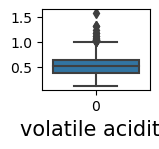

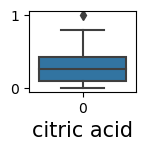

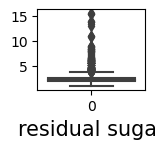

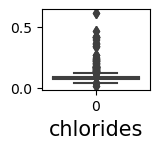

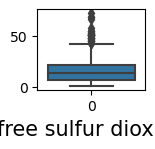

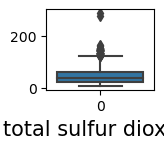

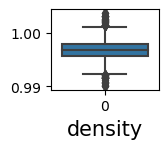

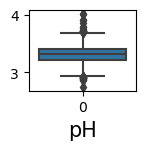

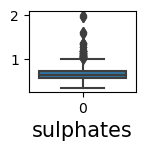

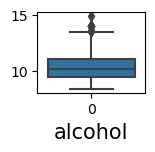

In [62]:
#Checking for outliers

plt.figure(figsize=(20,25))
graph=1

for column in df_features:
    plt.subplot(4,4, graph)
    ax=sns.boxplot(data=df_features[column])
    plt.xlabel(column,fontsize=15)
    graph+=1
    plt.show()

In [ ]:
#Every colum seem to have outliers. Removing all the outliers may lead to huge data loss. Hence we will check for skewness instead


In [63]:
df_features.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

In [32]:
#Clearly, residual sugar, chlorides, free sulphur dioxide, total sulphur dioxide and sulphates have high skewness

In [64]:
#Removing skewness
df_features['residual sugar']=np.cbrt(df_features['residual sugar'])

In [65]:
df_features['chlorides']=np.cbrt(df_features['chlorides'])
df_features['free sulfur dioxide']=np.cbrt(df_features['free sulfur dioxide'])
df_features['total sulfur dioxide']=np.cbrt(df_features['total sulfur dioxide'])
df_features['sulphates']=np.cbrt(df_features['sulphates'])

In [66]:
df_features.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          2.532201
chlorides               3.059529
free sulfur dioxide     0.247358
total sulfur dioxide    0.393746
density                 0.071288
pH                      0.193683
sulphates               1.322148
alcohol                 0.860829
dtype: float64

In [ ]:
#This has fixed the skewness for all the features that seemed problematic


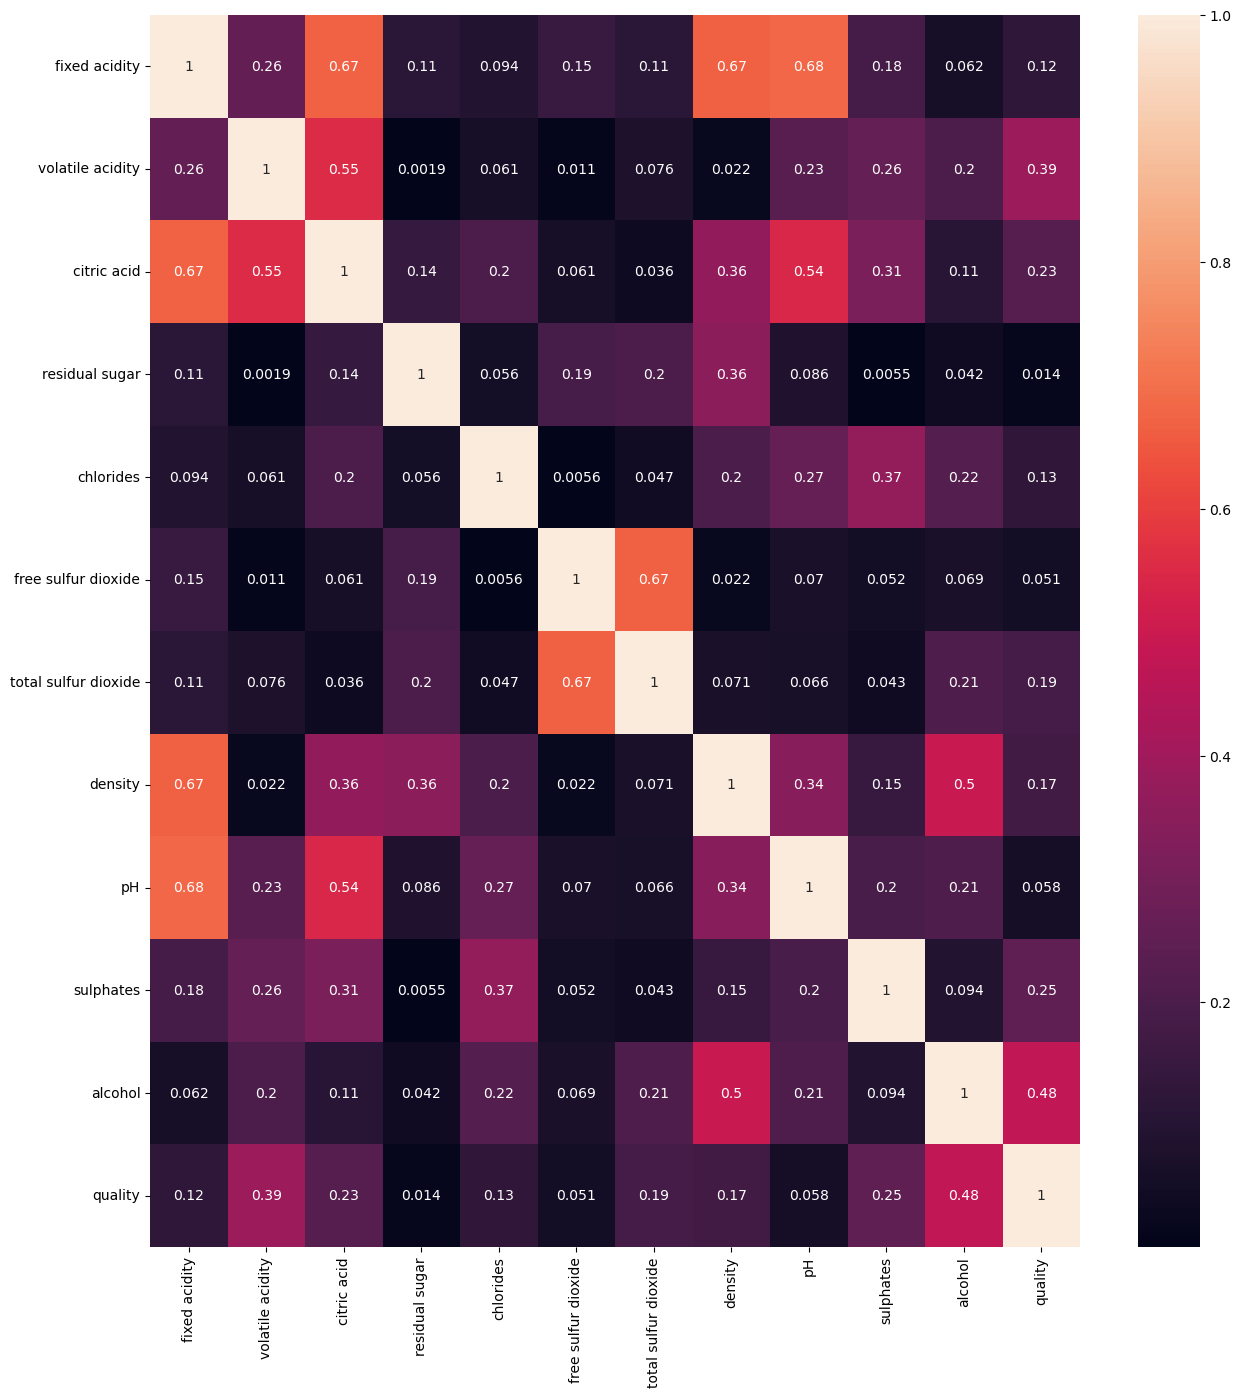

In [67]:
#Plotting heatmap to check for corelation between features-
df_corr= data.corr().abs()
plt.figure(figsize=(15,16))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10})
plt.show()


In [ ]:
#There doesn't seem much correlation between features that can seem to be an issue


<Axes: title={'center': 'Correlation with quality'}>

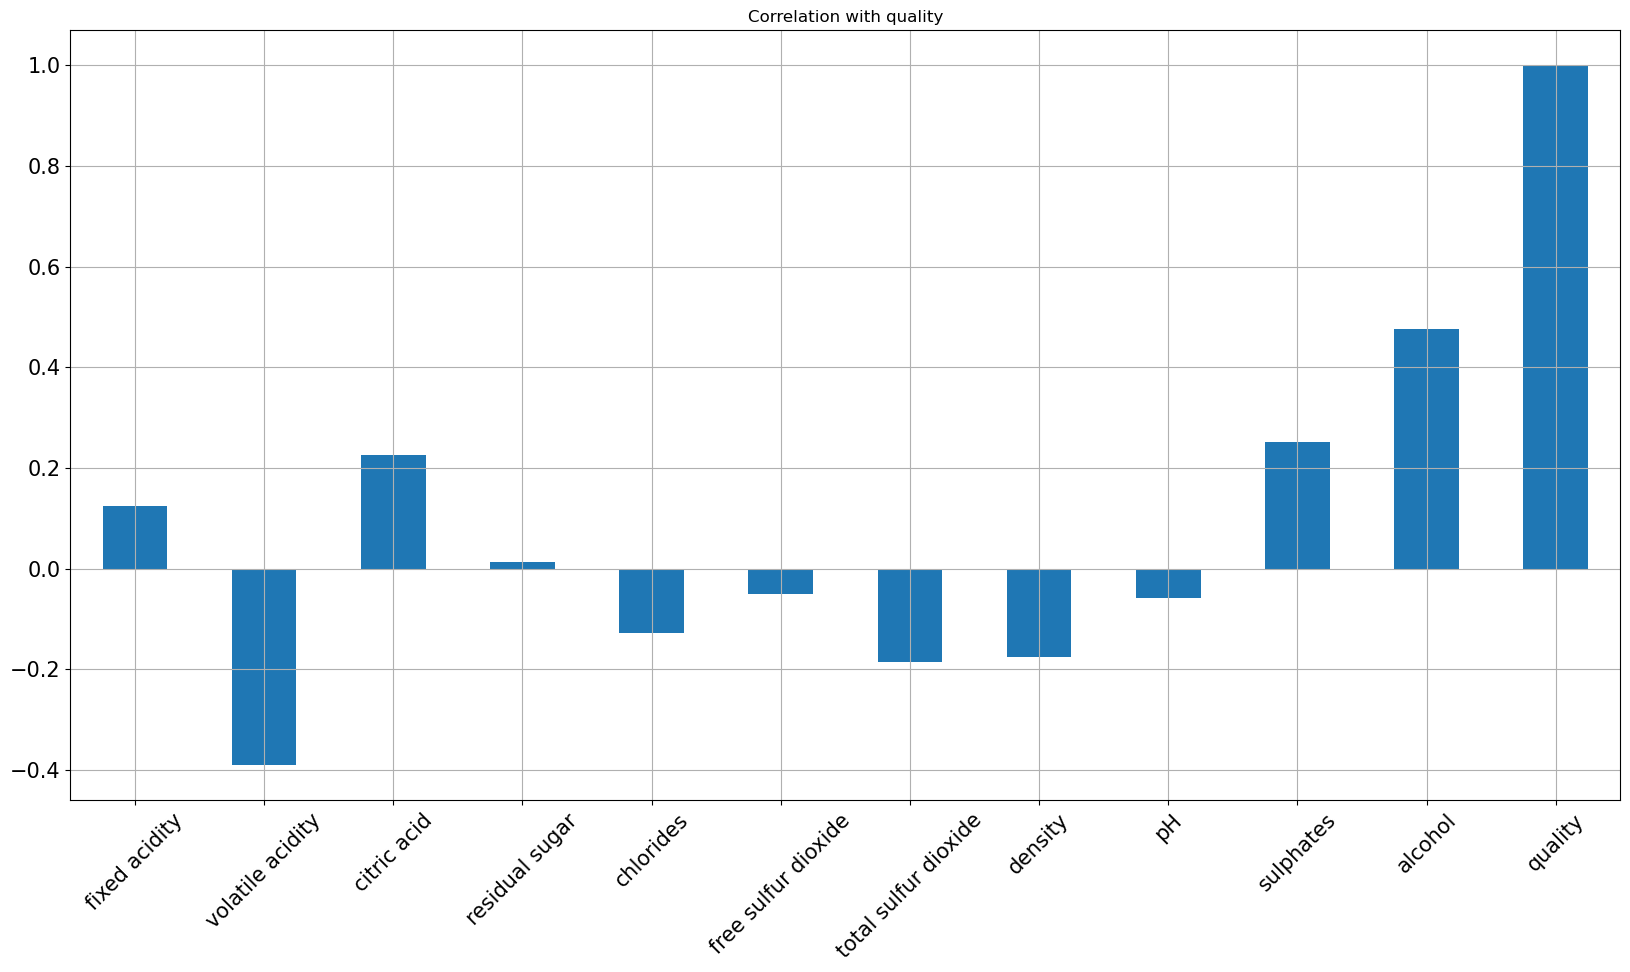

In [68]:
#Correlation with Quality with respect to attributes
data.corrwith(data.quality).plot.bar(
        figsize = (20, 10), title = "Correlation with quality", fontsize = 15,
        rot = 45, grid = True)

In [19]:
#Residual sugar seems to have least impact on the quality of wine, hence dropping this feature would be the best.


In [69]:
#Binarization of quality
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [70]:
data['quality']=[1 if x>=7 else 0 for x in data['quality']]

In [78]:
data['quality'].unique()

array([0, 1], dtype=int64)

In [79]:
#Checking data is balance for quality(label)
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [80]:
#removing residual sugar and also separating features and label
X=data.drop(columns=['residual sugar', 'quality'])
y=data['quality']

In [81]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

In [82]:
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)


In [83]:
X_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [125]:
#Spliting the Dataset for train and test
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=41)

In [126]:
y_train

1069    0
1055    0
422     0
916     0
1248    0
       ..
407     1
243     1
321     0
1104    0
931     0
Name: quality, Length: 1119, dtype: int64

In [127]:
#Data seesms to be imabalanced, handleing imbalanced data using SMOTE
from imblearn.over_sampling import SMOTE


In [128]:
x_train_ns,y_train_ns = SMOTE().fit_resample(x_train,y_train)

In [129]:
y_train_ns.value_counts()

0    968
1    968
Name: quality, dtype: int64

In [214]:
#Model building
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score


In [215]:
lr = LogisticRegression()
lr.fit(x_train, y_train)





LogisticRegression()

In [216]:
# Predicting Test Set
y_pred1 = lr.predict(x_test)
acc = accuracy_score(y_test, y_pred1)
prec = precision_score(y_test, y_pred1)
rec = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

In [217]:
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model_', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)


                Model_  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.889583   0.724138  0.318182  0.442105


In [218]:
#SVC
from sklearn.svm import SVC

In [219]:
svc = SVC()
svc.fit(x_train,y_train)


SVC()

In [220]:
# Predicting Test Set
y_pred2 = svc.predict(x_test)
acc = accuracy_score(y_test, y_pred2)
prec = precision_score(y_test, y_pred2)
rec = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)


In [221]:
model_results = pd.DataFrame([['SVC', acc, prec, rec, f1]],
               columns = ['Model_', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)


                Model_  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.889583   0.724138  0.318182  0.442105
1                  SVC  0.897917   1.000000  0.257576  0.409639


In [222]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [223]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [224]:
# Predicting Test Set
y_pred3 = knn.predict(x_test)
acc = accuracy_score(y_test, y_pred3)
prec = precision_score(y_test, y_pred3)
rec = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)

In [225]:
model_results = pd.DataFrame([['KNN', acc, prec, rec, f1]],
               columns = ['Model_', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)


                Model_  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.889583   0.724138  0.318182  0.442105
1                  SVC  0.897917   1.000000  0.257576  0.409639
2                  KNN  0.877083   0.566038  0.454545  0.504202


In [226]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier


In [227]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [228]:
# Predicting Test Set
y_pred4 = dt.predict(x_test)
acc = accuracy_score(y_test, y_pred4)
prec = precision_score(y_test, y_pred4)
rec = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)

In [229]:
model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model_', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                Model_  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.889583   0.724138  0.318182  0.442105
1                  SVC  0.897917   1.000000  0.257576  0.409639
2                  KNN  0.877083   0.566038  0.454545  0.504202
3        Decision Tree  0.893750   0.608696  0.636364  0.622222


In [230]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [231]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)


RandomForestClassifier()

In [232]:
# Predicting Test Set
y_pred5 = rf.predict(x_test)
acc = accuracy_score(y_test, y_pred5)
prec = precision_score(y_test, y_pred5)
rec = recall_score(y_test, y_pred5)
f1 = f1_score(y_test, y_pred5)

In [233]:
model_results = pd.DataFrame([['Random Forest Classifier', acc, prec, rec, f1]],
               columns = ['Model_', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                     Model_  Accuracy  Precision    Recall  F1 Score
0       Logistic Regression  0.889583   0.724138  0.318182  0.442105
1                       SVC  0.897917   1.000000  0.257576  0.409639
2                       KNN  0.877083   0.566038  0.454545  0.504202
3             Decision Tree  0.893750   0.608696  0.636364  0.622222
4  Random Forest Classifier  0.922917   0.853659  0.530303  0.654206


In [234]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [235]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [236]:
# Predicting Test Set
y_pred6 = gbc.predict(x_test)
acc = accuracy_score(y_test, y_pred6)
prec = precision_score(y_test, y_pred6)
rec = recall_score(y_test, y_pred6)
f1 = f1_score(y_test, y_pred6)

In [237]:
model_results = pd.DataFrame([['Gradient Boosting Classifier', acc, prec, rec, f1]],
               columns = ['Model_', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                         Model_  Accuracy  Precision    Recall  F1 Score
0           Logistic Regression  0.889583   0.724138  0.318182  0.442105
1                           SVC  0.897917   1.000000  0.257576  0.409639
2                           KNN  0.877083   0.566038  0.454545  0.504202
3                 Decision Tree  0.893750   0.608696  0.636364  0.622222
4      Random Forest Classifier  0.922917   0.853659  0.530303  0.654206
5  Gradient Boosting Classifier  0.922917   0.822222  0.560606  0.666667


In [238]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
             'ACC':[accuracy_score(y_test,y_pred1)*100,
                   accuracy_score(y_test,y_pred2)*100,
                   accuracy_score(y_test,y_pred3)*100,
                   accuracy_score(y_test,y_pred4)*100,
                   accuracy_score(y_test,y_pred5)*100,
                   accuracy_score(y_test,y_pred6)*100]})

In [239]:
final_data

,Models,ACC
0,LR,88.958333
1,SVC,89.791667
2,KNN,87.708333
3,DT,89.375000
4,RF,92.291667
5,GBC,92.291667


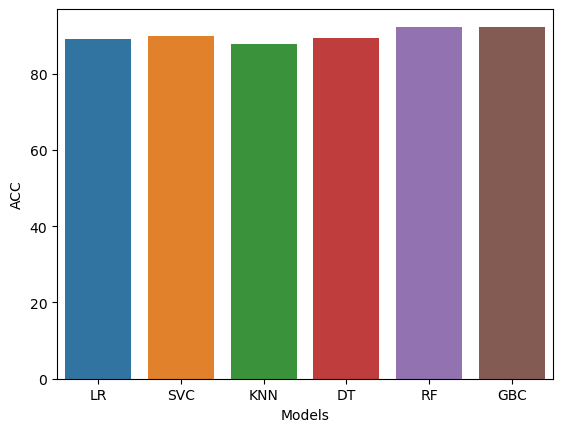

In [240]:
sns.barplot(x='Models', y='ACC', data=final_data)
plt.show()

In [ ]:
#Clearly Random Forest and Gradient Boosting models are giving the highest score, we can go with any of these, we will choose Random Forest Classifier


In [260]:
#Hyper parameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [261]:
parameter={'criterion':['gini','entropy'],
          'random_state':[10,50,100],
          'max_depth':[10,20,30],
          'n_jobs':[-1, 1, 2],
          'n_estimators':[50,100]}

In [262]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [263]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30], 'n_estimators': [50, 100],
                         'n_jobs': [-1, 1, 2], 'random_state': [10, 50, 100]})

In [264]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 50,
 'n_jobs': -1,
 'random_state': 50}

In [267]:
Final_model=RandomForestClassifier(criterion='entropy',max_depth=20,n_estimators=50,n_jobs= -1,random_state= 50)

In [268]:
Final_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=50,
                       n_jobs=-1, random_state=50)

In [270]:
pred=Final_model.predict(x_test)

In [271]:
acc=accuracy_score(y_test,pred)

In [272]:
print(acc*100)

92.5


In [273]:
#saving and loading data
import joblib

In [274]:
joblib.dump(Final_model,"wine quality")

['wine quality']

In [275]:
model = joblib.load("wine quality")

In [276]:
#Prediction on different data

In [280]:
new = pd.DataFrame({
    'fixed acidity':9.3,
    'volatile acidity':0.85,
    'citric acid':0.01,
    'chlorides':0.085,
    'free sulfur dioxide':11.0,
    'total sulfur dioxide':19.0,
    'density':0.845,
    'pH':2.39,
    'sulphates':0.67,
    'alcohol':12.0
    },index=[0])

In [281]:
new

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,9.3,0.85,0.01,0.085,11.0,19.0,0.845,2.39,0.67,12.0


In [283]:
model2 = scaler.transform(new)

In [287]:
n= model.predict(model2)


In [288]:
n

array([0], dtype=int64)

In [289]:
if n[0] == 1:
    print("Good Quality")
else:
    print("Bad Quality")

Bad Quality
